<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_ciencia_datos.png">

<br><br><center><h1 style="font-size:2em;color:#2467C0">Caso de estudio 2: Diabetes tipo 2 en México</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="figuras/diabetes.jpg" align="middle" style="width:350px"/></td>
<td>

La diabetes mellitus (diabetes tipo 2) es la segunda causa de muerte en México. De acuerdo con estadísticas del INEGI, en 2016 murieron 105 mil 574 mexicanos debido a la diabetes.

En 2017 se registró una tasa de 405.12 casos de diabetes tipo 2 por cada 100 mil habitantes en México; mientras que en 2018, dicho indicador aumentó a 411.85.

Las estadísticas de diabetes tipo 2 en México disponibles en el Anuario de Morbilidad de la Dirección General de Epidemiología revelan que en el último año aumentó 1.66 por ciento la incidencia de dicho padecimiento.
    
<br>
</td>
</tr>
</table>

## Conjunto de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.style.available
plt.style.use('seaborn-v0_8')

In [2]:
#Cargar el archivo datos/mexico_diabetes2_2017-2018.csv en un DataFrame llamado data
# si es necesario usar la opcion encoding = "ISO-8859-1"
data = pd.read_csv('datos/mexico_diabetes2_2017-2018.csv', encoding = "ISO-8859-1")

In [3]:
#Mostrar las primeras filas del DataFrame data
data.head()

,ENTIDAD,IDNAME,INCIDENCIA 2018,INCIDENCIA 2017
0,Aguascalientes,AS,478.52,645.77
1,Baja California,BC,661.29,567.10
2,Baja California Sur,BS,341.94,314.56
3,Campeche,CC,336.50,305.56
4,CDMX,DF,411.28,434.16


<div class="alert alert-success">
¿Cuales son los e estados con menor incidencia de casos en 2018?
</div>

In [4]:
data.sort_values(by=['INCIDENCIA 2018'], ascending=True)
data.head()

,ENTIDAD,IDNAME,INCIDENCIA 2018,INCIDENCIA 2017
0,Aguascalientes,AS,478.52,645.77
1,Baja California,BC,661.29,567.10
2,Baja California Sur,BS,341.94,314.56
3,Campeche,CC,336.50,305.56
4,CDMX,DF,411.28,434.16


In [5]:
data.sort_values(by=['INCIDENCIA 2018'], ascending=True, inplace=True)
data.head()

,ENTIDAD,IDNAME,INCIDENCIA 2018,INCIDENCIA 2017
20,Puebla,PL,241.09,244.85
21,Querétaro,QO,266.11,276.97
19,Oaxaca,OC,270.42,267.11
11,Guanajuato,GT,279.10,267.16
30,Yucatán,YN,319.98,308.35


<div class="alert alert-success">
¿Cuales son los e estados con mayor incidencia de casos en 2018?
</div>

In [6]:
data.sort_values(by=['INCIDENCIA 2018'], ascending=False, inplace=True)
data.head()

,ENTIDAD,IDNAME,INCIDENCIA 2018,INCIDENCIA 2017
27,Tamaulipas,TS,730.87,615.40
1,Baja California,BC,661.29,567.10
17,Nayarit,NT,620.71,488.03
9,Durango,DG,596.08,533.08
24,Sinaloa,SL,568.01,599.72


<div class="alert alert-success">
Construya una grafica de barras con los diferentes estados para el 2018 y una en dode se pueda comparar con el 2017
</div>

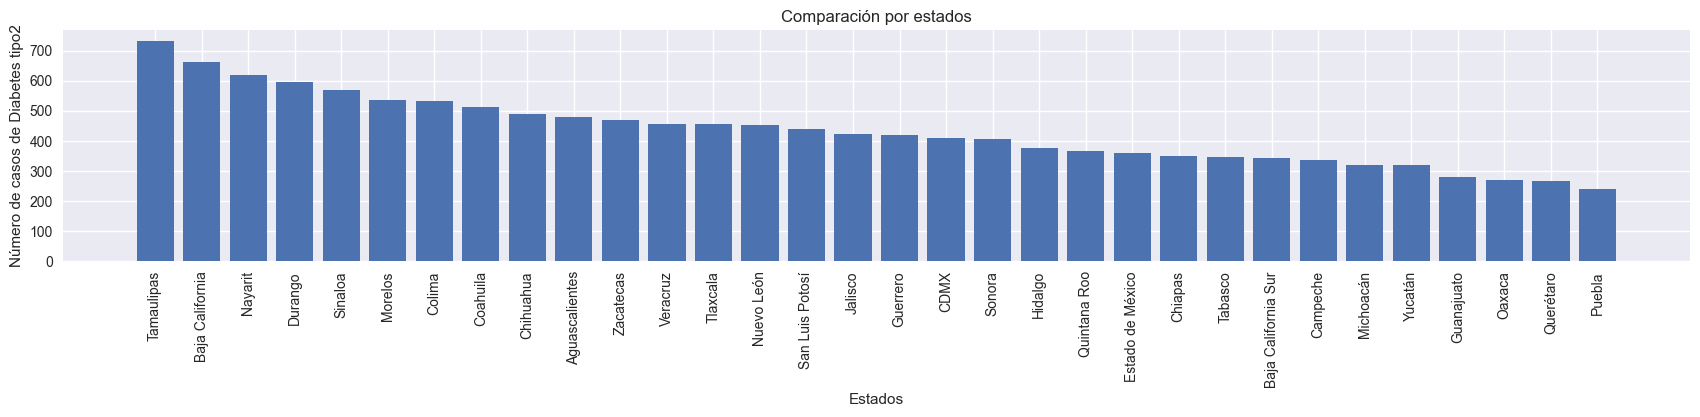

In [7]:
nombres = data['ENTIDAD'].values
valores = data['INCIDENCIA 2018'].values

plt.figure(figsize=(21, 3))
plt.bar(nombres, valores)
plt.xticks(rotation='vertical')
# Etiqueta de los ejes
plt.xlabel('Estados')
plt.ylabel('Número de casos de Diabetes tipo2')
#Titulo de la figura
plt.title('Comparación por estados')

plt.show()

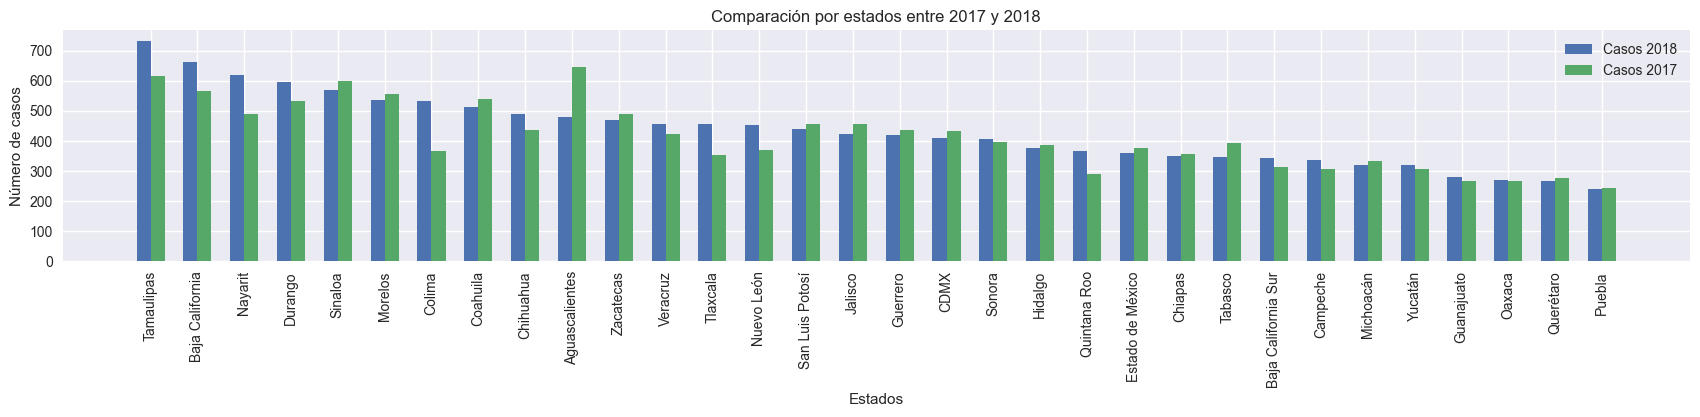

In [8]:
nombres = data['ENTIDAD'].values
valores2018 = data['INCIDENCIA 2018'].values
valores2017 = data['INCIDENCIA 2017'].values
N=len(nombres) # Número de estados

# ind = Posicion en el eje
ind = np.arange(N)
# Ancho de la barra 
width = 0.3  

plt.figure(figsize=(21, 3))


# Plotting
plt.bar(ind, valores2018 , width, label='Casos 2018')
plt.bar(ind + width, valores2017, width, label='Casos 2017')

plt.ylabel('Número de casos')
plt.xlabel('Estados')
plt.title('Comparación por estados entre 2017 y 2018')

plt.xticks(ind + width / 2, nombres )
plt.xticks(rotation='vertical')

plt.legend(loc='best')
plt.show()


<div class="alert alert-success">
Defina un nuevo parametro y agregue una nueva columna, para comparar la incidencia del 2018 y 2017
</div>

In [23]:
data['Comparador'] = 100*(data['INCIDENCIA 2017']-data['INCIDENCIA 2018'])/data['INCIDENCIA 2017']
data.head()

,ENTIDAD,IDNAME,INCIDENCIA 2018,INCIDENCIA 2017,Comparador
27,Tamaulipas,TS,730.87,615.40,-18.763406
1,Baja California,BC,661.29,567.10,-16.609064
17,Nayarit,NT,620.71,488.03,-27.186853
9,Durango,DG,596.08,533.08,-11.818114
24,Sinaloa,SL,568.01,599.72,5.287467


<div class="alert alert-success">
Defina un nuevo DataFrame, df_IDC, que contenga solo el ID y el parametro  "Comparador"
</div>

In [24]:
#Defina las máscaras  mask_indicator , mask_2011
df_IDC = data[['IDNAME','Comparador']]
df_IDC

,IDNAME,Comparador
27,TS,-18.763406
1,BC,-16.609064
17,NT,-27.186853
9,DG,-11.818114
24,SL,5.287467
16,MS,3.599706
8,CM,-45.449089
7,CL,4.600880
6,CH,-12.481944
0,AS,25.899314


<div class="alert alert-success">
Graficar los datos del parametro "Comparador" de los diferentes estados de México en un mapa
</div>

In [25]:
#Cargar el archivo datos/geo/mexico_estados_geo en la variable estados_geo  
estados_geo='datos/geo/mexico_estados_geo.json'

In [26]:
# importar la libreria  folium
import folium
# Defina una referencia para graficar los paises
# location= [latitud,longitud]
# zoom_start=zoom donde comenzará
mapa=folium.Map(location=[24, -102],zoom_start=5)
mapa

<div class="alert alert-warning">
Opciones de la función Choropleth :
    
<ul>
  <li>geo_data=variable que guarda los datos JSON</li>
  <li>data=DataFrame con los datos</li>
  <li>key_on='feature.id'</li>
  <li>fill_color=Estilo de colores</li>
  <li>fill_opacity=Opacidad del relleno de 0 a 1 </li>
  <li>line_opacity=Opacidad de la linea de 0 a 1</li>
  <li>legend_name=titulo</li>
</ul>
    
</div>

In [27]:
mapa=folium.Map(location=[24, -102],zoom_start=4)
titulo='Comparación de incrementos de diabetes entre 2017 y 2018'

folium.Choropleth(geo_data=estados_geo, data=df_IDC, 
             columns=['IDNAME', 'Comparador'],
             key_on='feature.id',
             fill_color='PRGn', fill_opacity=0.7, line_opacity=0.2, #YlGnBu
             legend_name=titulo).add_to(mapa)
mapa